In [123]:
import pandas as pd
import matplotlib as plt
import numpy as np


In [45]:
tobacco_df = pd.read_csv('Tobacco.csv')

In [47]:
tobacco_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'Topic', 'Question',
       'DataValue', 'DataValueUnit', 'DataValueType', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1'],
      dtype='object')

In [49]:
tobacco_df['DataValueUnit'].value_counts()

DataValueUnit
%                        36364
pack sales per capita      306
Name: count, dtype: int64

In [46]:
tobacco_df['Question'].value_counts()


Question
Current smoking among adults aged >= 18 years                                                                                                                                          8645
Quit attempts in the past year among current smokers                                                                                                                                   6293
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke                                                                                                  5852
Current smokeless tobacco use among adults aged >= 18 years                                                                                                                            5384
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke                                                                                                  4497
Current cigarette smoking among women aged 18-44 ye

In [ ]:
tobacco_df['LocationAbbr'].value_counts()

In [25]:
#This code will show me if the YearStart column and the YearEnd column are all the same or not
same_years = (tobacco_df['YearStart'] == tobacco_df['YearEnd']).all()

if same_years:
    print("The 'YearStart' and 'YearEnd' columns have the same values in all rows.")
else:
    print("The 'YearStart' and 'YearEnd' columns do not have the same values in all rows.")

The 'YearStart' and 'YearEnd' columns have the same values in all rows.


In [ ]:
#need to put the YearStart in order
tobacco_df=tobacco_df.sort_values(by='YearEnd')
tobacco_df

In [28]:
#This would turn 'YearEnd' into a date time by year but im sure why would need to do this will investigate more
#tobacco_df['YearEnd'] = pd.to_datetime(tobacco_df['YearEnd'], format='%Y')

#This code allows us to display value counts in order by year so we can see the order of years and how many rows of data each year contains
# use this code if you convert to datetime (year_end_counts = tobacco_df['YearEnd'].dt.year.value_counts().sort_index())
year_end_counts = tobacco_df['YearEnd'].value_counts().sort_index()
year_end_counts
#data summary for years: it looks like 2007 could be considered an outlier and possibly unusable for our analysis

YearEnd
2007      51
2011    3144
2012    3261
2013    3677
2014    3289
2015    3435
2016    3307
2017    3684
2018    3302
2019    3773
2020    3167
2021    2580
Name: count, dtype: int64

In [29]:
# chekcing the dtype of the column 'YearEnd', thus far int64 is our goal, but might check again if datetime becomes our targeted dtype
tobacco_df['YearEnd'].dtype


dtype('int64')

In [ ]:
#need to explore what kind of data we have in the DataValue comlumn to see what we can compare and use for a graph
#footnotes should give me an idea of what the numbers mean, check against documentation for further understanding
#need to understand if the questions datavalue is infering more or lesslikley hood of chronic desease
#Questions could be something that we could compare, need to check if the datavalues are comparable for all the same Questions
#what will groupby do if i groupby question: desired result it will group all same questions together to have comparable data amongst the same questions
#I might also need to groupby year: desired result all the same question whithin a particular year grouped together so I can show yearly changes with comparable data
#The LocationAbbr includes US, which has to be addressed
#we need to seperate or group by year,question, stratificationCategory1 and then stratification1 if not Overall


tobacco_df


In [ ]:
smokless_df =tobacco_df.loc[tobacco_df['Question'] == 'Current smokeless tobacco use among adults aged >= 18 years']
smokless_df

In [80]:
#grouped_tobacco_df = tobacco_df.groupby(['YearEnd','Question','StratificationCategory1','Stratification1','LocationAbbr']).sort_values(by = 'YearEnd')

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [88]:
#This groups the dataframe first by Year and then question, StratificationCat1, stratification, and finally groups by location
#It then applys a lambda function to make sure the years are in order.
#This currently does not address US in the locations with individual states
grouped_tobacco_df = tobacco_df.groupby(['YearEnd','Question','StratificationCategory1','Stratification1','LocationAbbr']).apply(
    lambda x: x.sort_values(by = 'YearEnd')).reset_index(drop = True)

grouped_tobacco_df.head()

C:\Users\tyzwh\AppData\Local\Temp\ipykernel_32328\3017661057.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_tobacco_df = tobacco_df.groupby(['YearEnd','Question','StratificationCategory1','Stratification1','LocationAbbr']).apply(


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,2007,2007,AK,Tobacco,Percent tobacco revenue to fund at CDC recomme...,13.0,%,Percent,NaN,NaN,NaN,Overall,Overall
1,2007,2007,AL,Tobacco,Percent tobacco revenue to fund at CDC recomme...,23.0,%,Percent,NaN,NaN,NaN,Overall,Overall
2,2007,2007,AR,Tobacco,Percent tobacco revenue to fund at CDC recomme...,18.0,%,Percent,NaN,NaN,NaN,Overall,Overall
3,2007,2007,AZ,Tobacco,Percent tobacco revenue to fund at CDC recomme...,18.0,%,Percent,NaN,NaN,NaN,Overall,Overall
4,2007,2007,CA,Tobacco,Percent tobacco revenue to fund at CDC recomme...,24.0,%,Percent,NaN,NaN,NaN,Overall,Overall


In [56]:
#use this to look at a list of possible questions to choose from
grouped_tobacco_df['Question'].value_counts()

Question
Current smoking among adults aged >= 18 years                                                                                                                                          8645
Quit attempts in the past year among current smokers                                                                                                                                   6293
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke                                                                                                  5852
Current smokeless tobacco use among adults aged >= 18 years                                                                                                                            5384
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke                                                                                                  4497
Current cigarette smoking among women aged 18-44 ye

In [85]:
#lets choose a question with an easy to understand and compareble data value with the location being the US and the stratification being overall
# ill start by looking at questions and datavaluess
us_overall_smokingb4pregnancy_df =grouped_tobacco_df.loc[grouped_tobacco_df['Question'] == 'Cigarette smoking before pregnancy'].loc[grouped_tobacco_df['LocationAbbr'] == 'US']\
.loc[grouped_tobacco_df['StratificationCategory1'] == 'Overall']

us_overall_smokingb4pregnancy_df

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
3218,2012,2012,US,Tobacco,Cigarette smoking before pregnancy,22.3,%,Crude Prevalence,NaN,21.6,23.0,Overall,Overall
6480,2013,2013,US,Tobacco,Cigarette smoking before pregnancy,21.3,%,Crude Prevalence,NaN,20.7,22.0,Overall,Overall
10154,2014,2014,US,Tobacco,Cigarette smoking before pregnancy,21.1,%,Crude Prevalence,NaN,20.4,21.8,Overall,Overall
13448,2015,2015,US,Tobacco,Cigarette smoking before pregnancy,19.4,%,Crude Prevalence,NaN,18.7,20.0,Overall,Overall
16880,2016,2016,US,Tobacco,Cigarette smoking before pregnancy,17.1,%,Crude Prevalence,NaN,16.5,17.8,Overall,Overall
20192,2017,2017,US,Tobacco,Cigarette smoking before pregnancy,17.7,%,Crude Prevalence,NaN,17.1,18.3,Overall,Overall
23883,2018,2018,US,Tobacco,Cigarette smoking before pregnancy,16.7,%,Crude Prevalence,NaN,16.2,17.3,Overall,Overall
27186,2019,2019,US,Tobacco,Cigarette smoking before pregnancy,15.1,%,Crude Prevalence,NaN,14.6,15.7,Overall,Overall
30958,2020,2020,US,Tobacco,Cigarette smoking before pregnancy,14.0,%,Crude Prevalence,US estimate/number is based on fewer than 50 s...,13.4,14.5,Overall,Overall


<Axes: xlabel='YearEnd'>

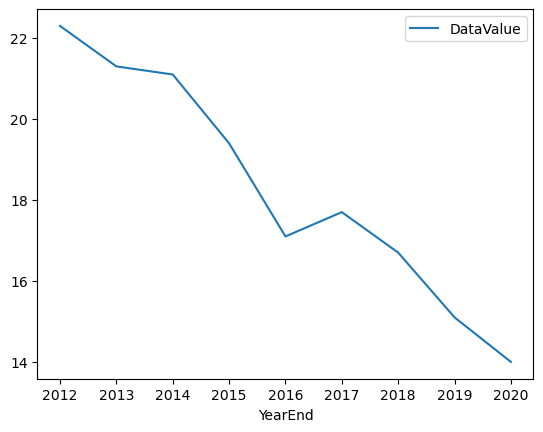

In [68]:
us_overall_smokingb4pregnancy_df.plot(x = 'YearEnd', y = "DataValue")

AttributeError: Line2D.set() got an unexpected keyword argument 'Y'

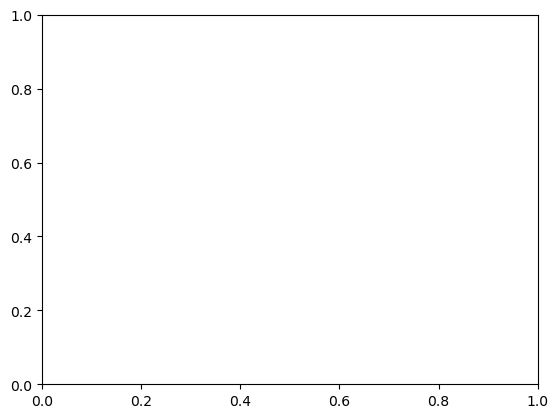

In [89]:
tobacco_df.plot(x = 'YearEnd', Y = ['Current smokeless tobacco use among adults aged >= 18 years','Current smoking among adults aged >= 18 years'])

In [86]:
tobacco_df['Question'].value_counts()

Question
Current smoking among adults aged >= 18 years                                                                                                                                          8645
Quit attempts in the past year among current smokers                                                                                                                                   6293
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke                                                                                                  5852
Current smokeless tobacco use among adults aged >= 18 years                                                                                                                            5384
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke                                                                                                  4497
Current cigarette smoking among women aged 18-44 ye

In [126]:
#we first filtered the dataframe to only include 2 questions as well as location = US, stratification = Overall

question_year_df =grouped_tobacco_df.loc[grouped_tobacco_df['Question'].isin(['Current smoking among adults aged >= 18 years', 'Current smokeless tobacco use among adults aged >= 18 years'])].loc[grouped_tobacco_df['LocationAbbr'] == 'US']\
.loc[grouped_tobacco_df['StratificationCategory1'] == 'Overall']

#put each question into its own list
# Create new columns based on the values in the 'Initial_Column'
question_year_df['Question1'] = np.where(question_year_df['Question'] =='Current smoking among adults aged >= 18 years',
                                         question_year_df['DataValue'],
                                         np.nan)
question_year_df['Question2'] = np.where(question_year_df['Question'] =='Current smokeless tobacco use among adults aged >= 18 years',
                                         question_year_df['DataValue'],
                                         np.nan)
question_year_df.head()


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Question1,Question2
594,2011,2011,US,Tobacco,Current smokeless tobacco use among adults age...,4.4,%,Crude Prevalence,50 States + DC: US Median,3.6,4.8,Overall,Overall,NaN,4.4
595,2011,2011,US,Tobacco,Current smokeless tobacco use among adults age...,4.5,%,Age-adjusted Prevalence,50 States + DC: US Median,3.7,5.0,Overall,Overall,NaN,4.5
1115,2011,2011,US,Tobacco,Current smoking among adults aged >= 18 years,21.2,%,Crude Prevalence,50 States + DC: US Median,20.0,22.4,Overall,Overall,21.2,NaN
1116,2011,2011,US,Tobacco,Current smoking among adults aged >= 18 years,21.3,%,Age-adjusted Prevalence,50 States + DC: US Median,20.3,22.5,Overall,Overall,21.3,NaN
3808,2012,2012,US,Tobacco,Current smokeless tobacco use among adults age...,4.1,%,Age-adjusted Prevalence,50 States + DC: US Median,3.9,4.7,Overall,Overall,NaN,4.1


In [127]:
question_year_df.columns


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'Topic', 'Question',
       'DataValue', 'DataValueUnit', 'DataValueType', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Question1', 'Question2'],
      dtype='object')

In [150]:
question_year_filter = question_year_df[['YearEnd','Question1','Question2']]
#question_year_filter.set_index("YearEnd")
question_year_filter

,YearEnd,Question1,Question2
594,2011,NaN,4.4
595,2011,NaN,4.5
1115,2011,21.2,NaN
1116,2011,21.3,NaN
3808,2012,NaN,4.1
3809,2012,NaN,4.1
4318,2012,19.6,NaN
4319,2012,19.9,NaN
7387,2013,NaN,4.3
7388,2013,NaN,4.5


In [152]:
import matplotlib.pyplot as plt

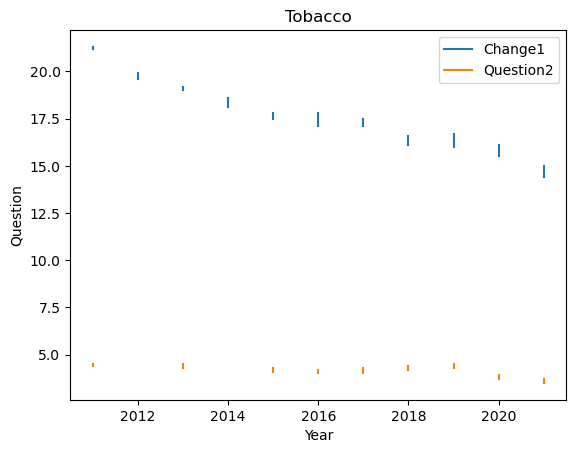

In [156]:
#ploting 2 question on the same graph with YearEnd as the x axis
plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
plt.xlabel('Year')
plt.ylabel('Question')
plt.title('Tobacco')
plt.legend()

C:\Users\tyzwh\AppData\Local\Temp\ipykernel_32328\2962594156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_year_filter['YearEnd'] = question_year_filter['YearEnd'].astype(int)


<Axes: >

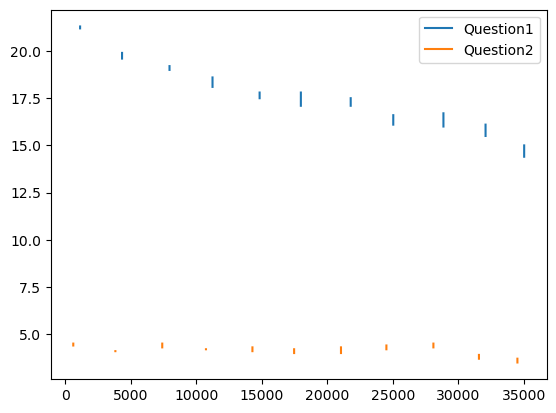

In [148]:
#df['column_name'] = df['column_name'].astype(int)
question_year_filter['YearEnd'] = question_year_filter['YearEnd'].astype(int)

question_year_filter[['Question1', 'Question2']].plot()



#question_year_filter.plot(y = 'Question1', 'Question2')


In [ ]:
us_overall_df =grouped_tobacco_df.loc[grouped_tobacco_df['Question'].isin(['Current smoking among adults aged >= 18 years', 'Current smokeless tobacco use among adults aged >= 18 years'])].loc[grouped_tobacco_df['LocationAbbr'] == 'US']\
.loc[grouped_tobacco_df['StratificationCategory1'] == 'Overall']

us_overall_df.tail()


<Axes: title={'center': 'Question'}, xlabel='YearEnd', ylabel='DataValue'>

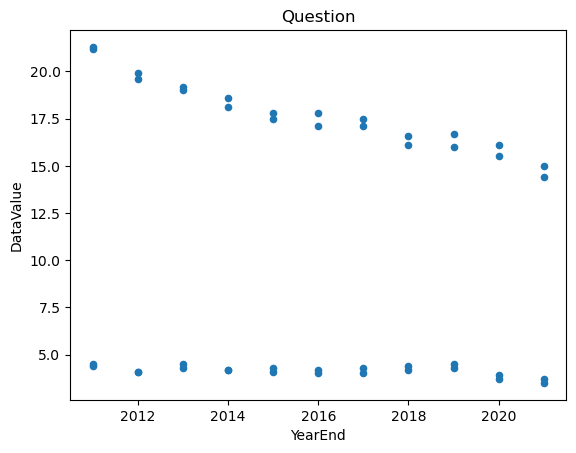

In [102]:
us_overall_df.plot(kind = 'scatter', x='YearEnd', y= 'DataValue', title ='Question' )